In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("covid_data.csv")

In [12]:
data.head(5)

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242


In [13]:
data.count()

Country/Region    187
Confirmed         187
Deaths            187
Recovered         187
dtype: int64

In [14]:
data.isnull().sum() # checks if there is any null data in the file

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

<Axes: >

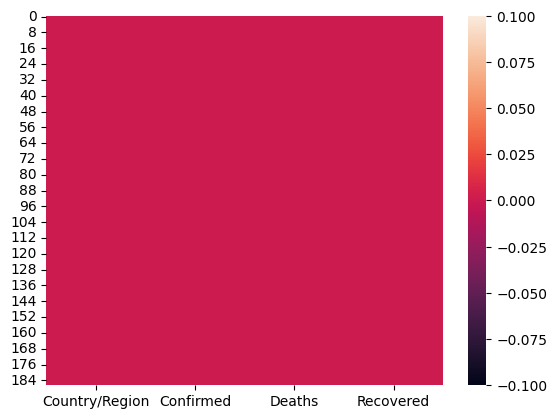

In [17]:
sns.heatmap(data.isnull()) # no null values so same color everywhere

### doing groupping by country/region and analyzing

In [20]:
data.groupby('Country/Region').sum().head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242
Antigua and Barbuda,86,3,65
Argentina,167416,3059,72575
Armenia,37390,711,26665
Australia,15303,167,9311


In [44]:
data.groupby("Country/Region")['Recovered'].sum().head(10)
# this is now series as it has only one value/ column (in series format)

Country/Region
Afghanistan            25198
Albania                 2745
Algeria                18837
Andorra                  803
Angola                   242
Antigua and Barbuda       65
Argentina              72575
Armenia                26665
Australia               9311
Austria                18246
Name: Recovered, dtype: int64

In [45]:
data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False)
# this is a series so series.sort_values(ascending=False) no 'by' argument needed in series.sort_values() as it has only one value

Country/Region
US                       4290259
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: Confirmed, Length: 187, dtype: int64

In [46]:
data.groupby('Country/Region').sum().sort_values(by='Recovered')
# this is a dataframe so for dataframe, df.sort_values(by="") by argument is needed for sorting dataframe, as it has multiple values

,Confirmed,Deaths,Recovered
Country/Region,,,
Canada,116458,8944,0
Mozambique,1701,11,0
Timor-Leste,24,0,0
Serbia,24141,543,0
Sweden,79395,5700,0
...,...,...,...
Chile,347923,9187,319954
Russia,816680,13334,602249
India,1480073,33408,951166


In [47]:
data.groupby('Country/Region')[['Confirmed','Recovered']].sum().head(10)
# this is done when we need to print 2 or more datas
# this is a dataframe now as it has 2 values/ 2 columns

,Confirmed,Recovered
Country/Region,,
Afghanistan,36263,25198
Albania,4880,2745
Algeria,27973,18837
Andorra,907,803
Angola,950,242
Antigua and Barbuda,86,65
Argentina,167416,72575
Armenia,37390,26665
Australia,15303,9311


### Remove all the records where confirmed cases is less then 100

In [53]:
(data.Confirmed<100).sum()

np.int64(16)

In [55]:
data[data.Confirmed<100]

,Country/Region,Confirmed,Deaths,Recovered
5,Antigua and Barbuda,86,3,65
17,Belize,48,2,26
19,Bhutan,99,0,86
49,Dominica,18,0,18
59,Fiji,27,0,18
68,Greenland,14,0,13
69,Grenada,23,0,23
75,Holy See,12,0,12
94,Laos,20,0,19
100,Liechtenstein,86,1,81


In [59]:
data[~(data.Confirmed<100)] # this prints all the data except data.Confirmed<100
# if i do data = data[~(data.Confirmed<100)] then this will make the change in the original data

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
181,Vietnam,431,0,365
182,West Bank and Gaza,10621,78,3752
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


### region where maximum number of confirmed cases were recorded

In [67]:
data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64

### In which region minimum number of deaths were recorded

In [73]:
data.groupby('Country/Region')['Deaths'].sum().sort_values().head(20)

Country/Region
Cambodia                            0
Bhutan                              0
Fiji                                0
Eritrea                             0
Dominica                            0
Holy See                            0
Greenland                           0
Grenada                             0
Laos                                0
Mongolia                            0
Timor-Leste                         0
Seychelles                          0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Saint Kitts and Nevis               0
Papua New Guinea                    0
Vietnam                             0
Western Sahara                      1
Liechtenstein                       1
Burundi                             1
Name: Deaths, dtype: int64